![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [29]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt

# Start coding!

OBJECTIVE:

Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the "outcome" column), excluding the "id" column.

In [30]:
#Lets import data: 

df=pd.read_csv('car_insurance.csv')
df.head()
#df.info()
#incomplete columns ['credict_score' and 'annual millage']

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [31]:
#lets inspect row with NA values in credict_score

credit_score_Na = df[df['credit_score'].isna()]
credit_score_NotNa = df[~df['credit_score'].isna()]
#credit_score_Na.head(20)

#are this values Missing Completly At Random? Or just Missing at Random? 
# I think we could analyze the quatity distribution of rows for every categorical category

In [32]:
#I think its better to work with functions now to examine the oposite daframe with only no nulls and with only nulls values at credit_score column... 

#Function plot_histogram_grid
def plot_histogram_grid(df, num_cols=4, num_rows=4):
    """
    Plots a grid of histograms for the columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    num_cols (int): The number of columns in the grid. Default is 4.
    num_rows (int): The number of rows in the grid. Default is 4.
    """
    # Create a grid for plotting
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes = axes.flatten()

    # Loop through each column and plot a histogram
    for i, col in enumerate(df.columns):
        if i >= num_cols * num_rows:
            break
        ax = axes[i]
        ax.hist(df[col].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black', label=f'{col}')
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, num_cols * num_rows):
        fig.delaxes(axes[j])

    # Plot it
    plt.show()

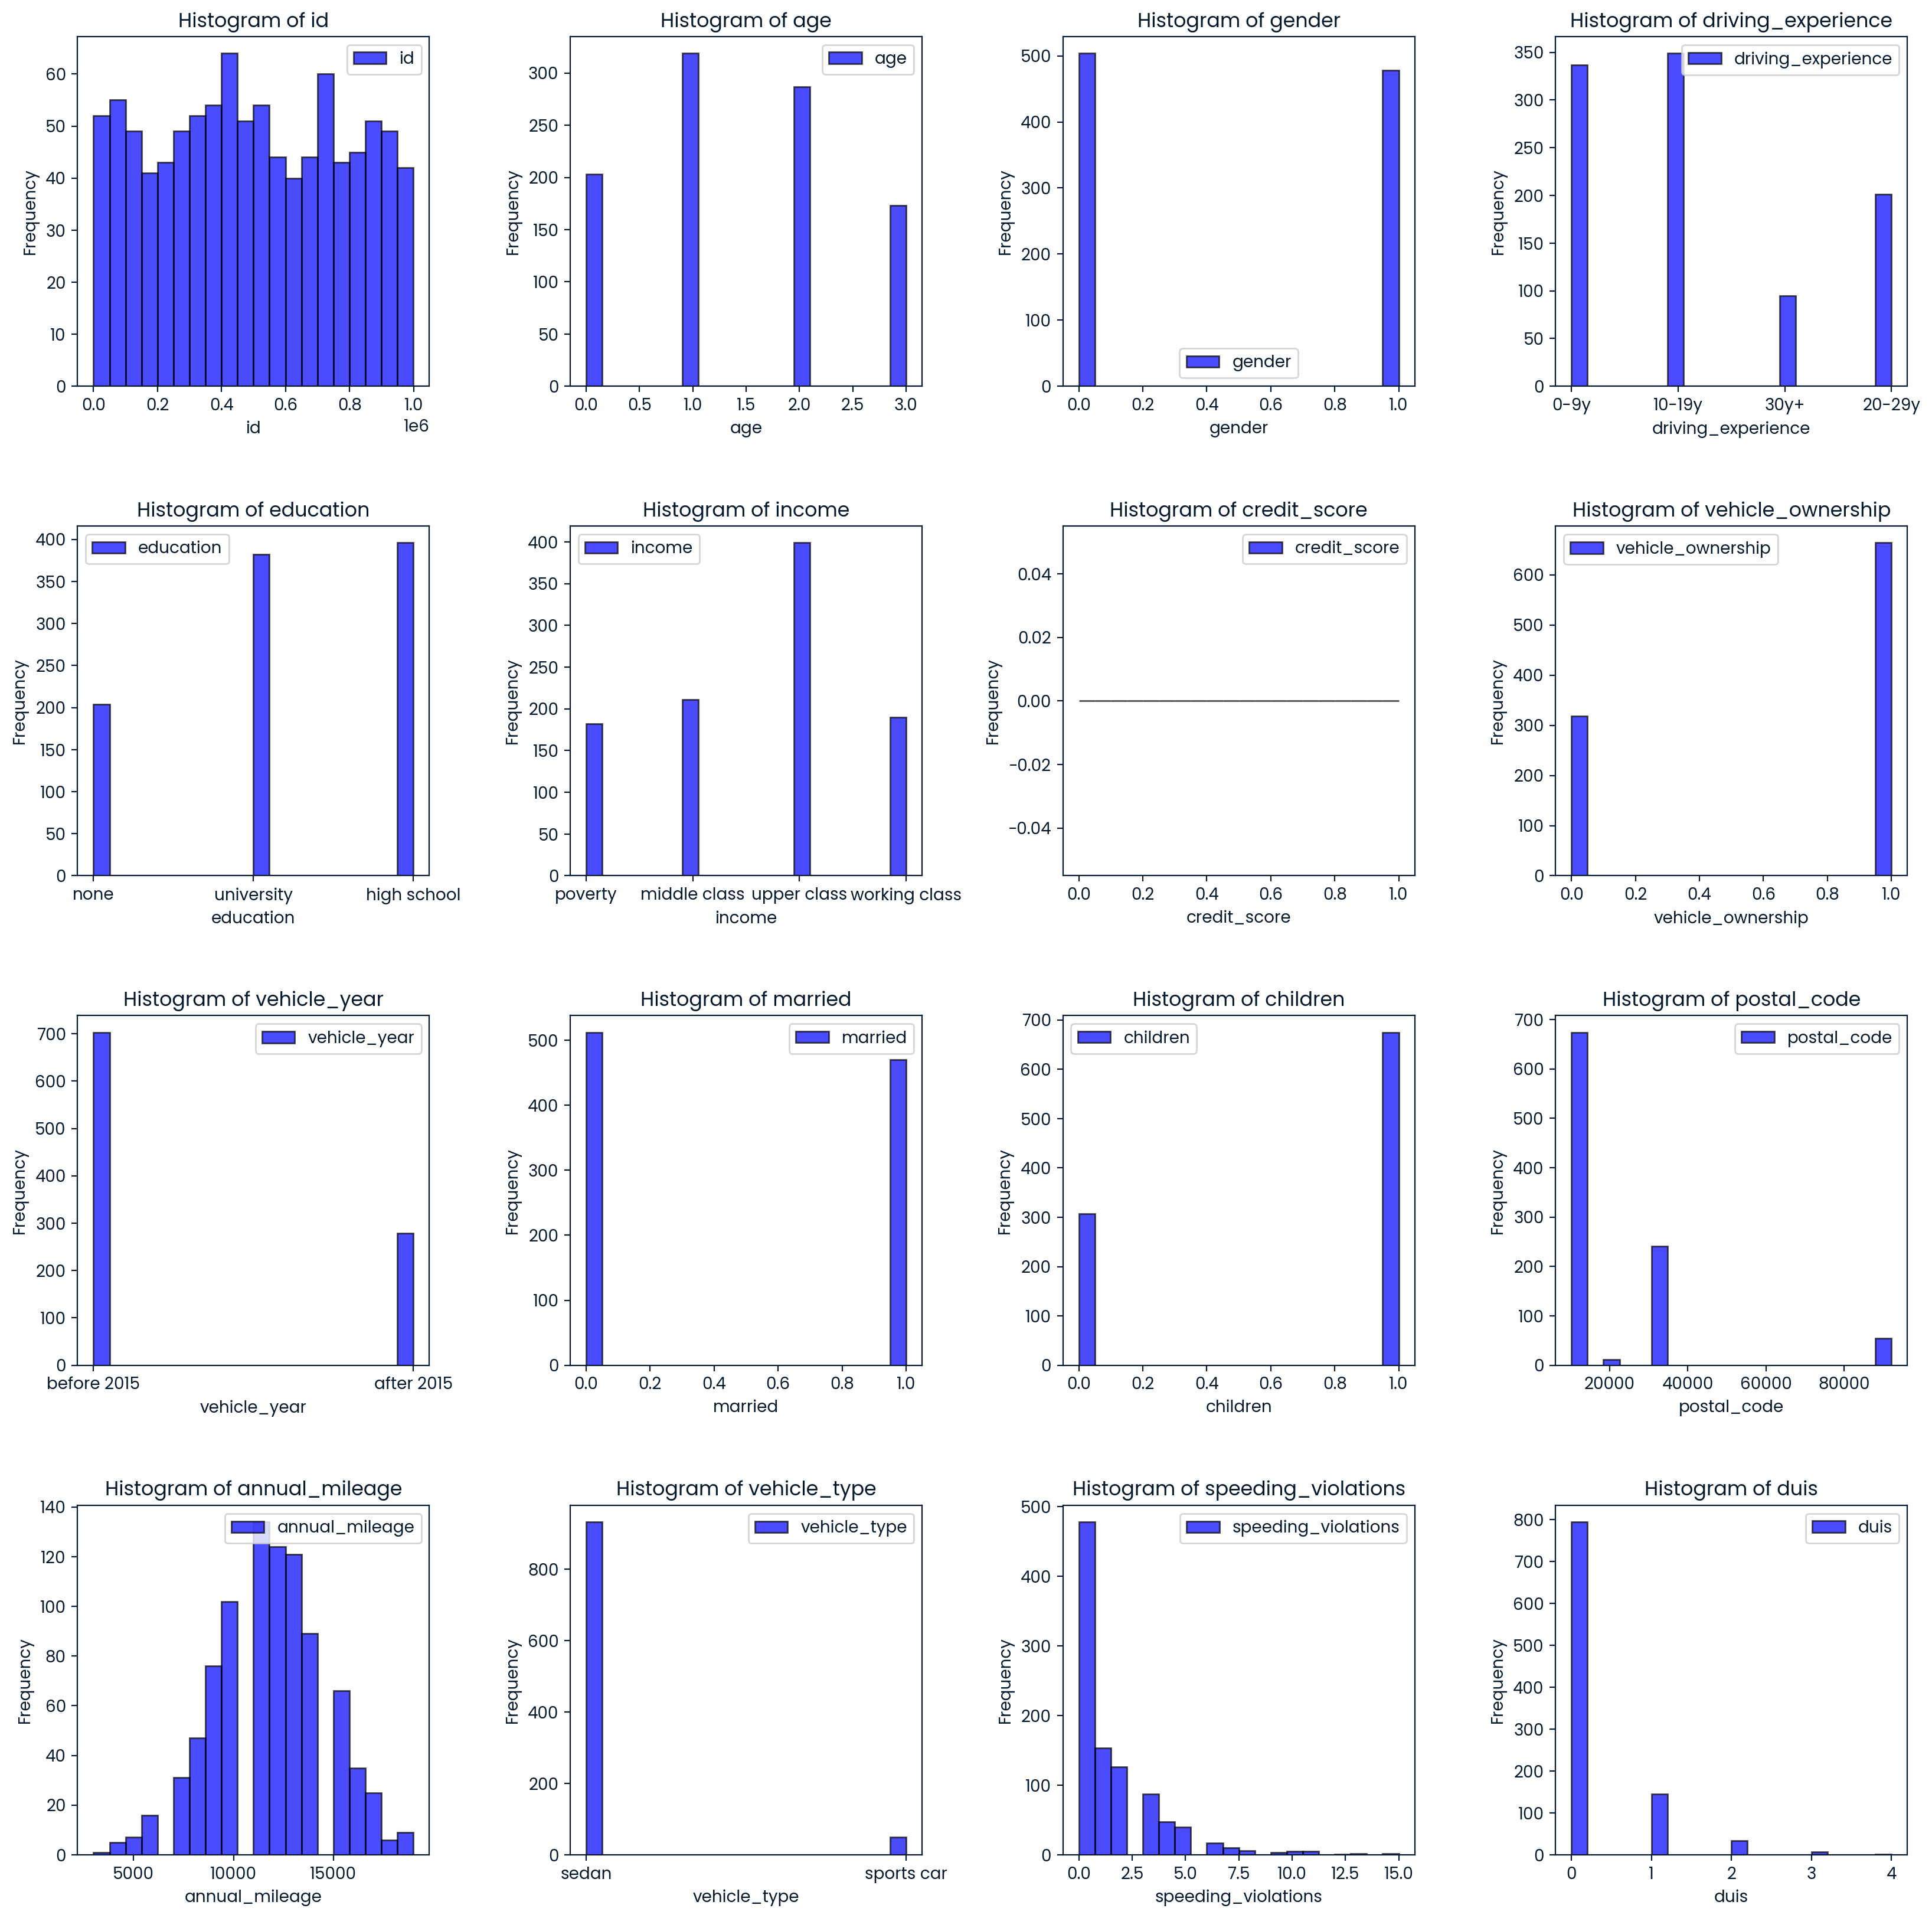

In [33]:
# NULLS VALUES: 
plot_histogram_grid(credit_score_Na)

## *08/27/2024_23:47HRS log-Nicolas:* 
### - Houston everything looks normal! I repeat all normal... !!! Wait.... <br> - Last 3 features are not normal distribution but maybe thats normal, I have a hunch that in the whole data frame last 3 columns are exponential as well. <br> - Let me inform you back after furter inspections... 

## *08/27/2024_23:48HRS log-HoustonBase:*
### - Copy that

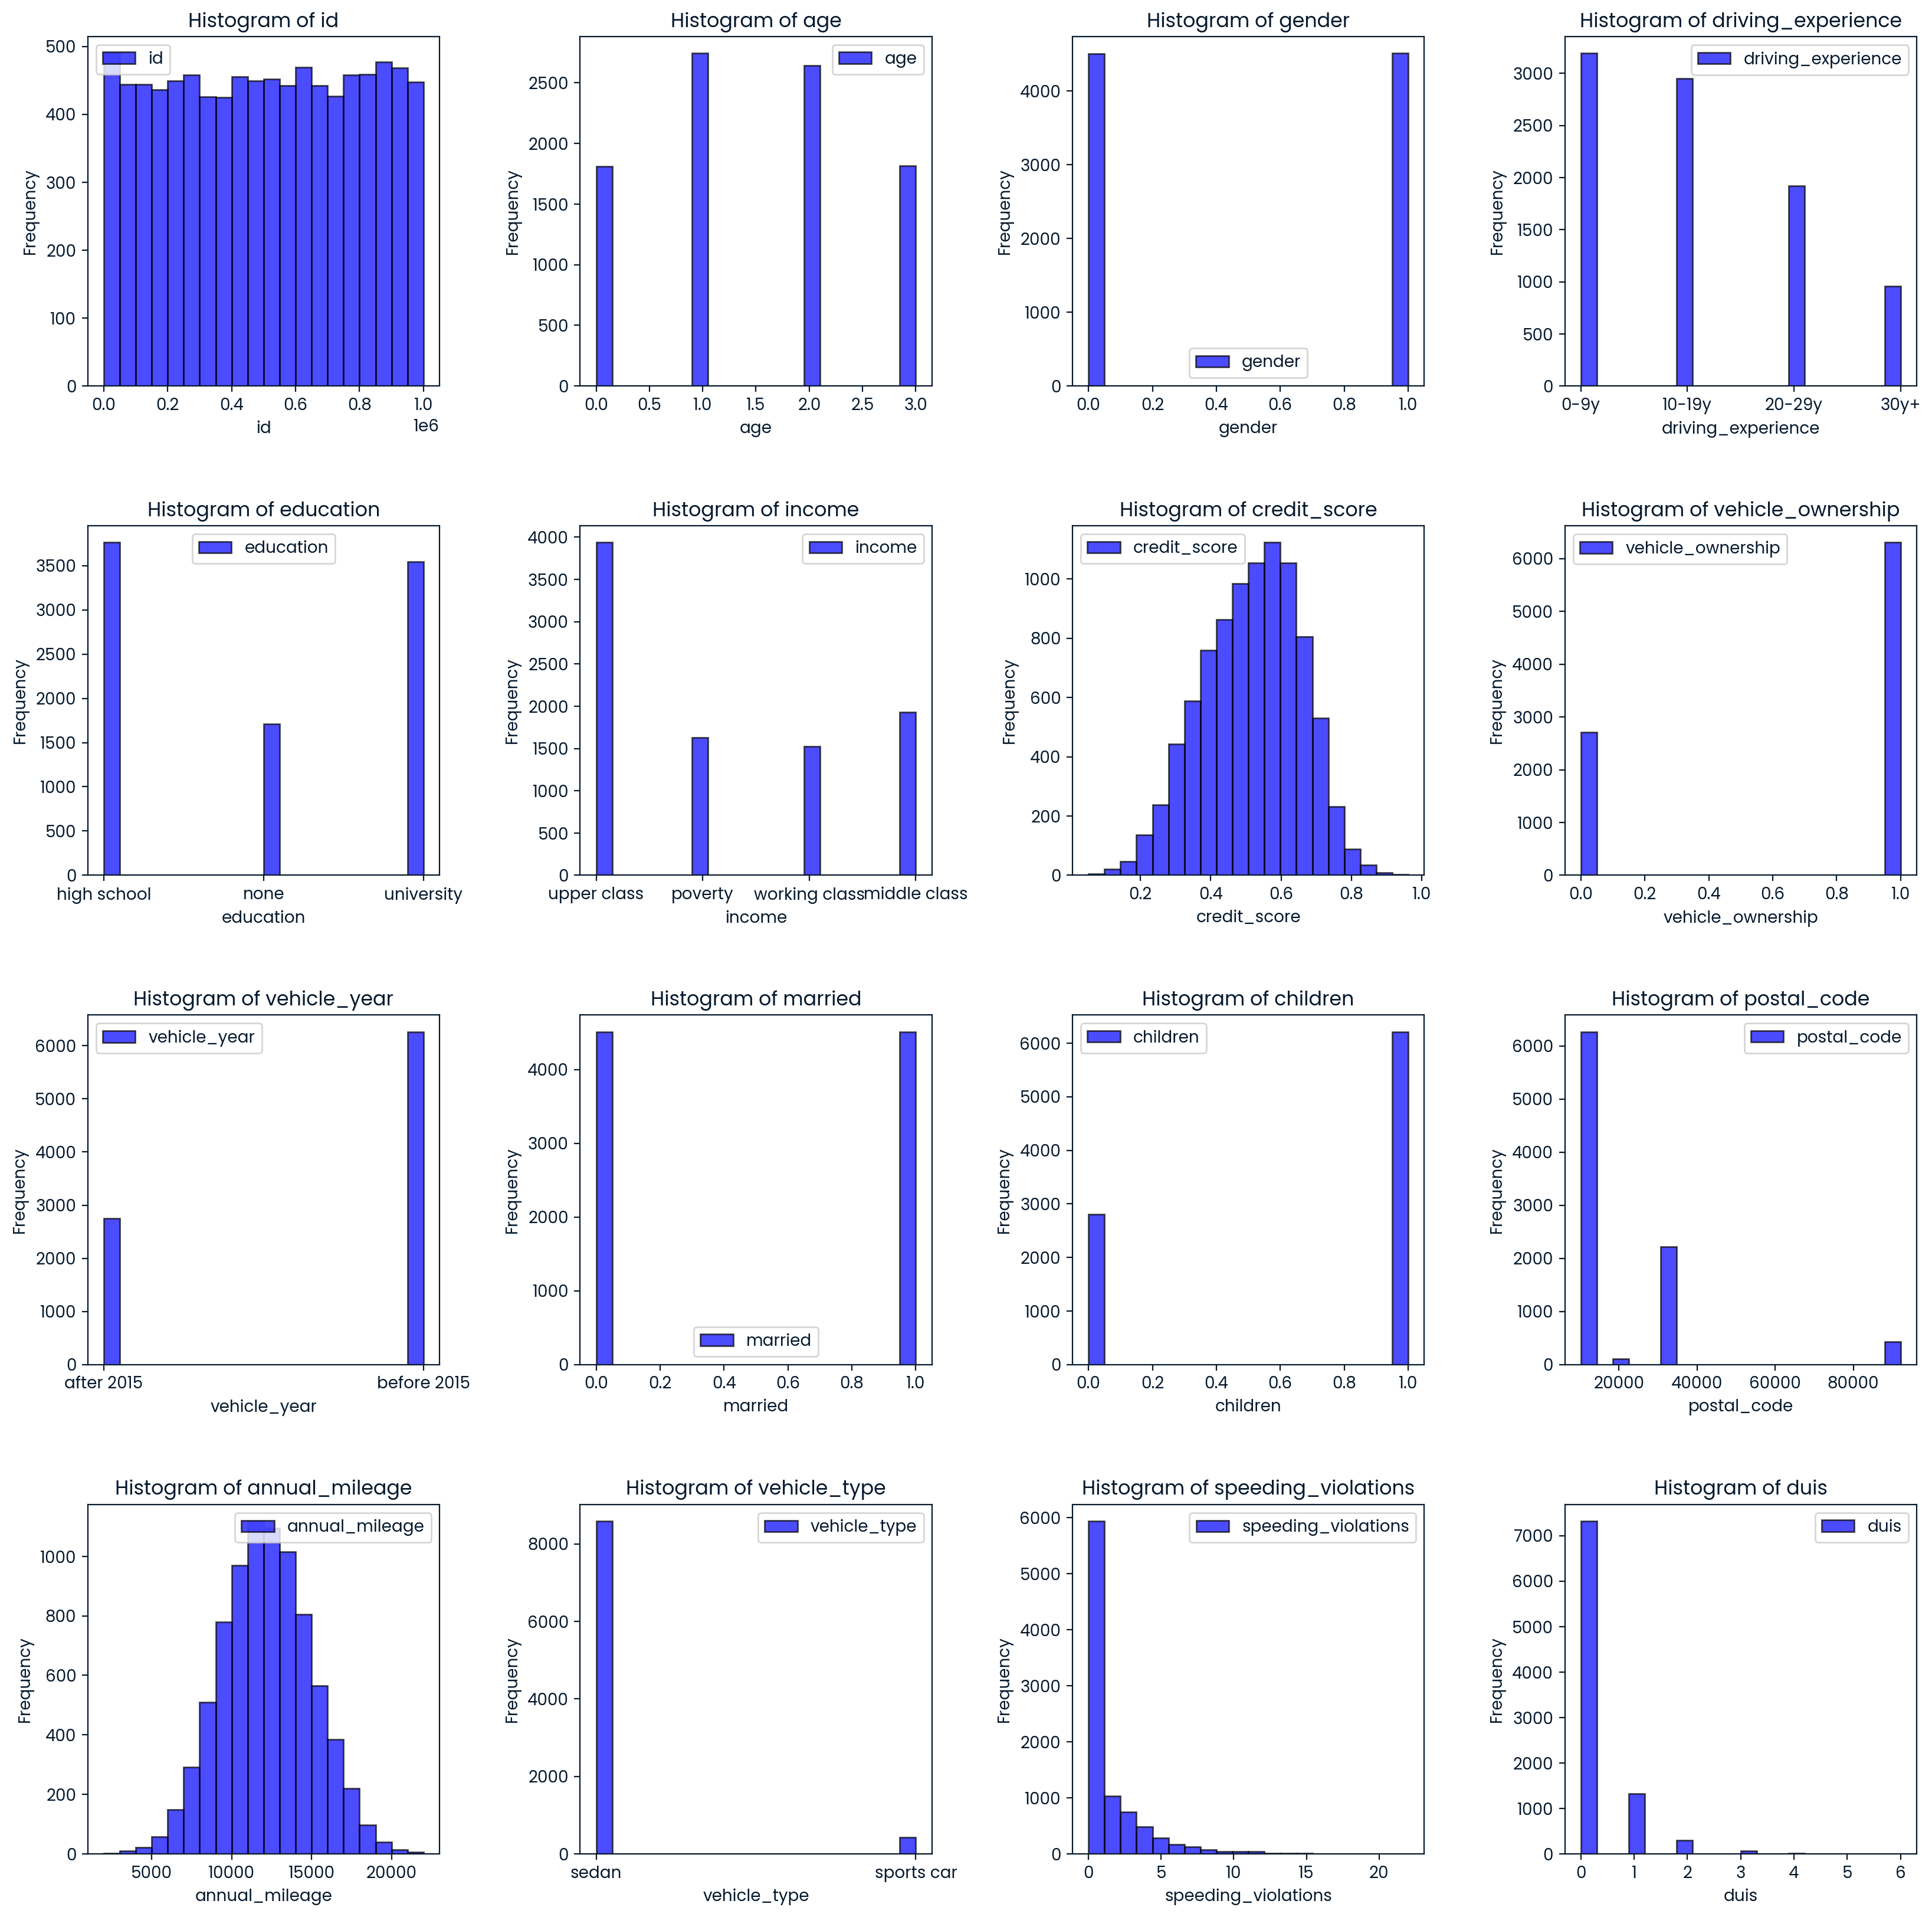

In [34]:
# NOT NULL VALUES
plot_histogram_grid(credit_score_NotNa)

## *08/27/2024_23:56HRS log-Nicolas:*
### - Housto Base, further inspections confirms that all distributions are normal and behave identlycally with or without the credit score values 

## *08/27/2024_23:59HRS log-HoustonBase:* 
### - Emmmm an What does that even means?

## *08/28/2024_00:02HRS log-Nicolas:*
### - I conclude that the mising values at credit score are an Missing Values Completly at Random error <br>- So... I conclude that we should use the credit score medeian for each income class to replace missing values

## *08/28/2024_00:08HRS log-HoustonBase:*
### - Got it! 


In [35]:
credit_score_NotNa.dtypes

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

In [36]:
#Lets calculate the median for each income class
Poverty_median = credit_score_NotNa[credit_score_NotNa['income']=='poverty']['credit_score'].median()
WorkingClass_median = credit_score_NotNa[credit_score_NotNa['income']=='working class']['credit_score'].median()
MiddleClass_median = credit_score_NotNa[credit_score_NotNa['income']=='middle class']['credit_score'].median()
UpperClass_median = credit_score_NotNa[credit_score_NotNa['income']=='upper class']['credit_score'].median()

Median_income = {'Powerty $': Poverty_median,'WorkingClass $':WorkingClass_median,'MiddleClass $':MiddleClass_median,'UpperClass $': UpperClass_median}

print(Median_income)

#Great now we know the median valuas to replace on empty credit_score values for each income type 

{'Powerty $': 0.349914746171538, 'WorkingClass $': 0.43137620534394916, 'MiddleClass $': 0.5267473391434415, 'UpperClass $': 0.6162893385757949}


In [37]:
#Great now we know the median valuas to replace on empty credit_score values for each income type

df.loc[(df['income'] == 'poverty') & (df['credit_score'].isnull()), 'credit_score'] = Poverty_median
df.loc[(df['income'] == 'working class') & (df['credit_score'].isnull()), 'credit_score'] = WorkingClass_median
df.loc[(df['income'] == 'middle class') & (df['credit_score'].isnull()), 'credit_score'] = MiddleClass_median
df.loc[(df['income'] == 'upper class') & (df['credit_score'].isnull()), 'credit_score'] = UpperClass_median

#df.info()
#Success!

In [38]:
#Now we need to apply same analysis on annual_millage: 

annual_mill_Na = df[df['annual_mileage'].isna()]
annual_mill_NotNa = df[~df['annual_mileage'].isna()]


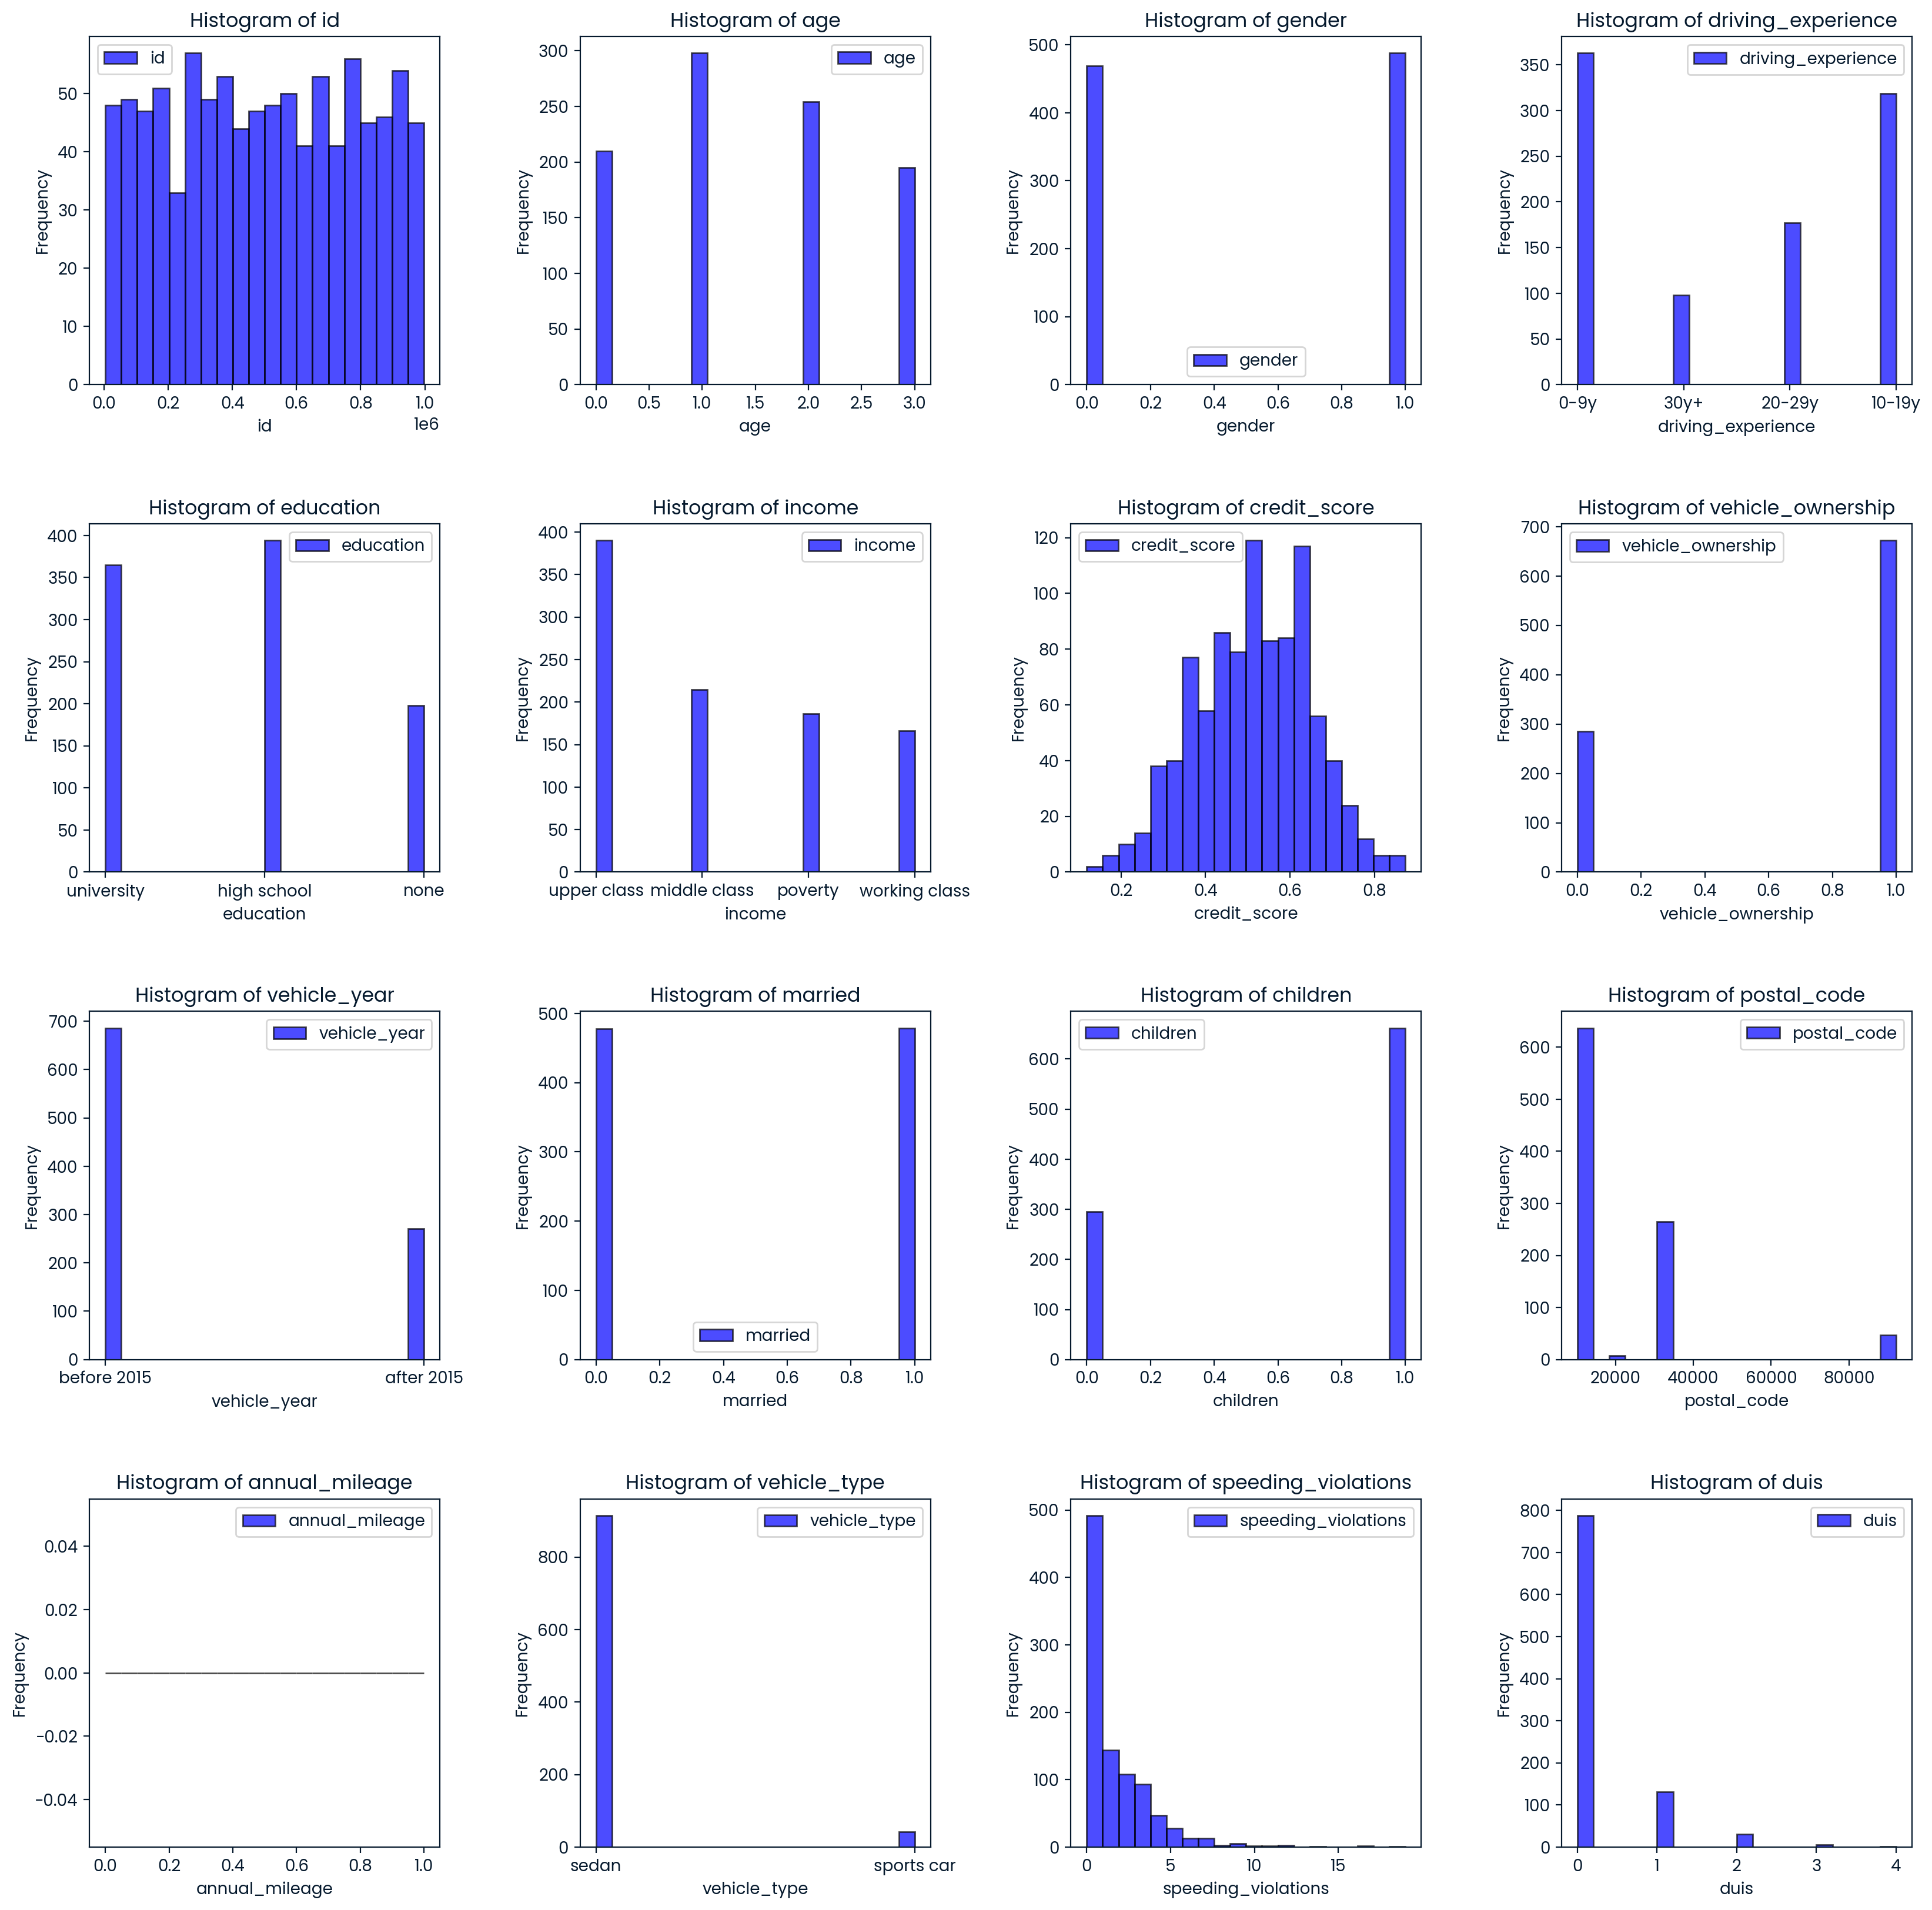

In [39]:
plot_histogram_grid(annual_mill_Na)

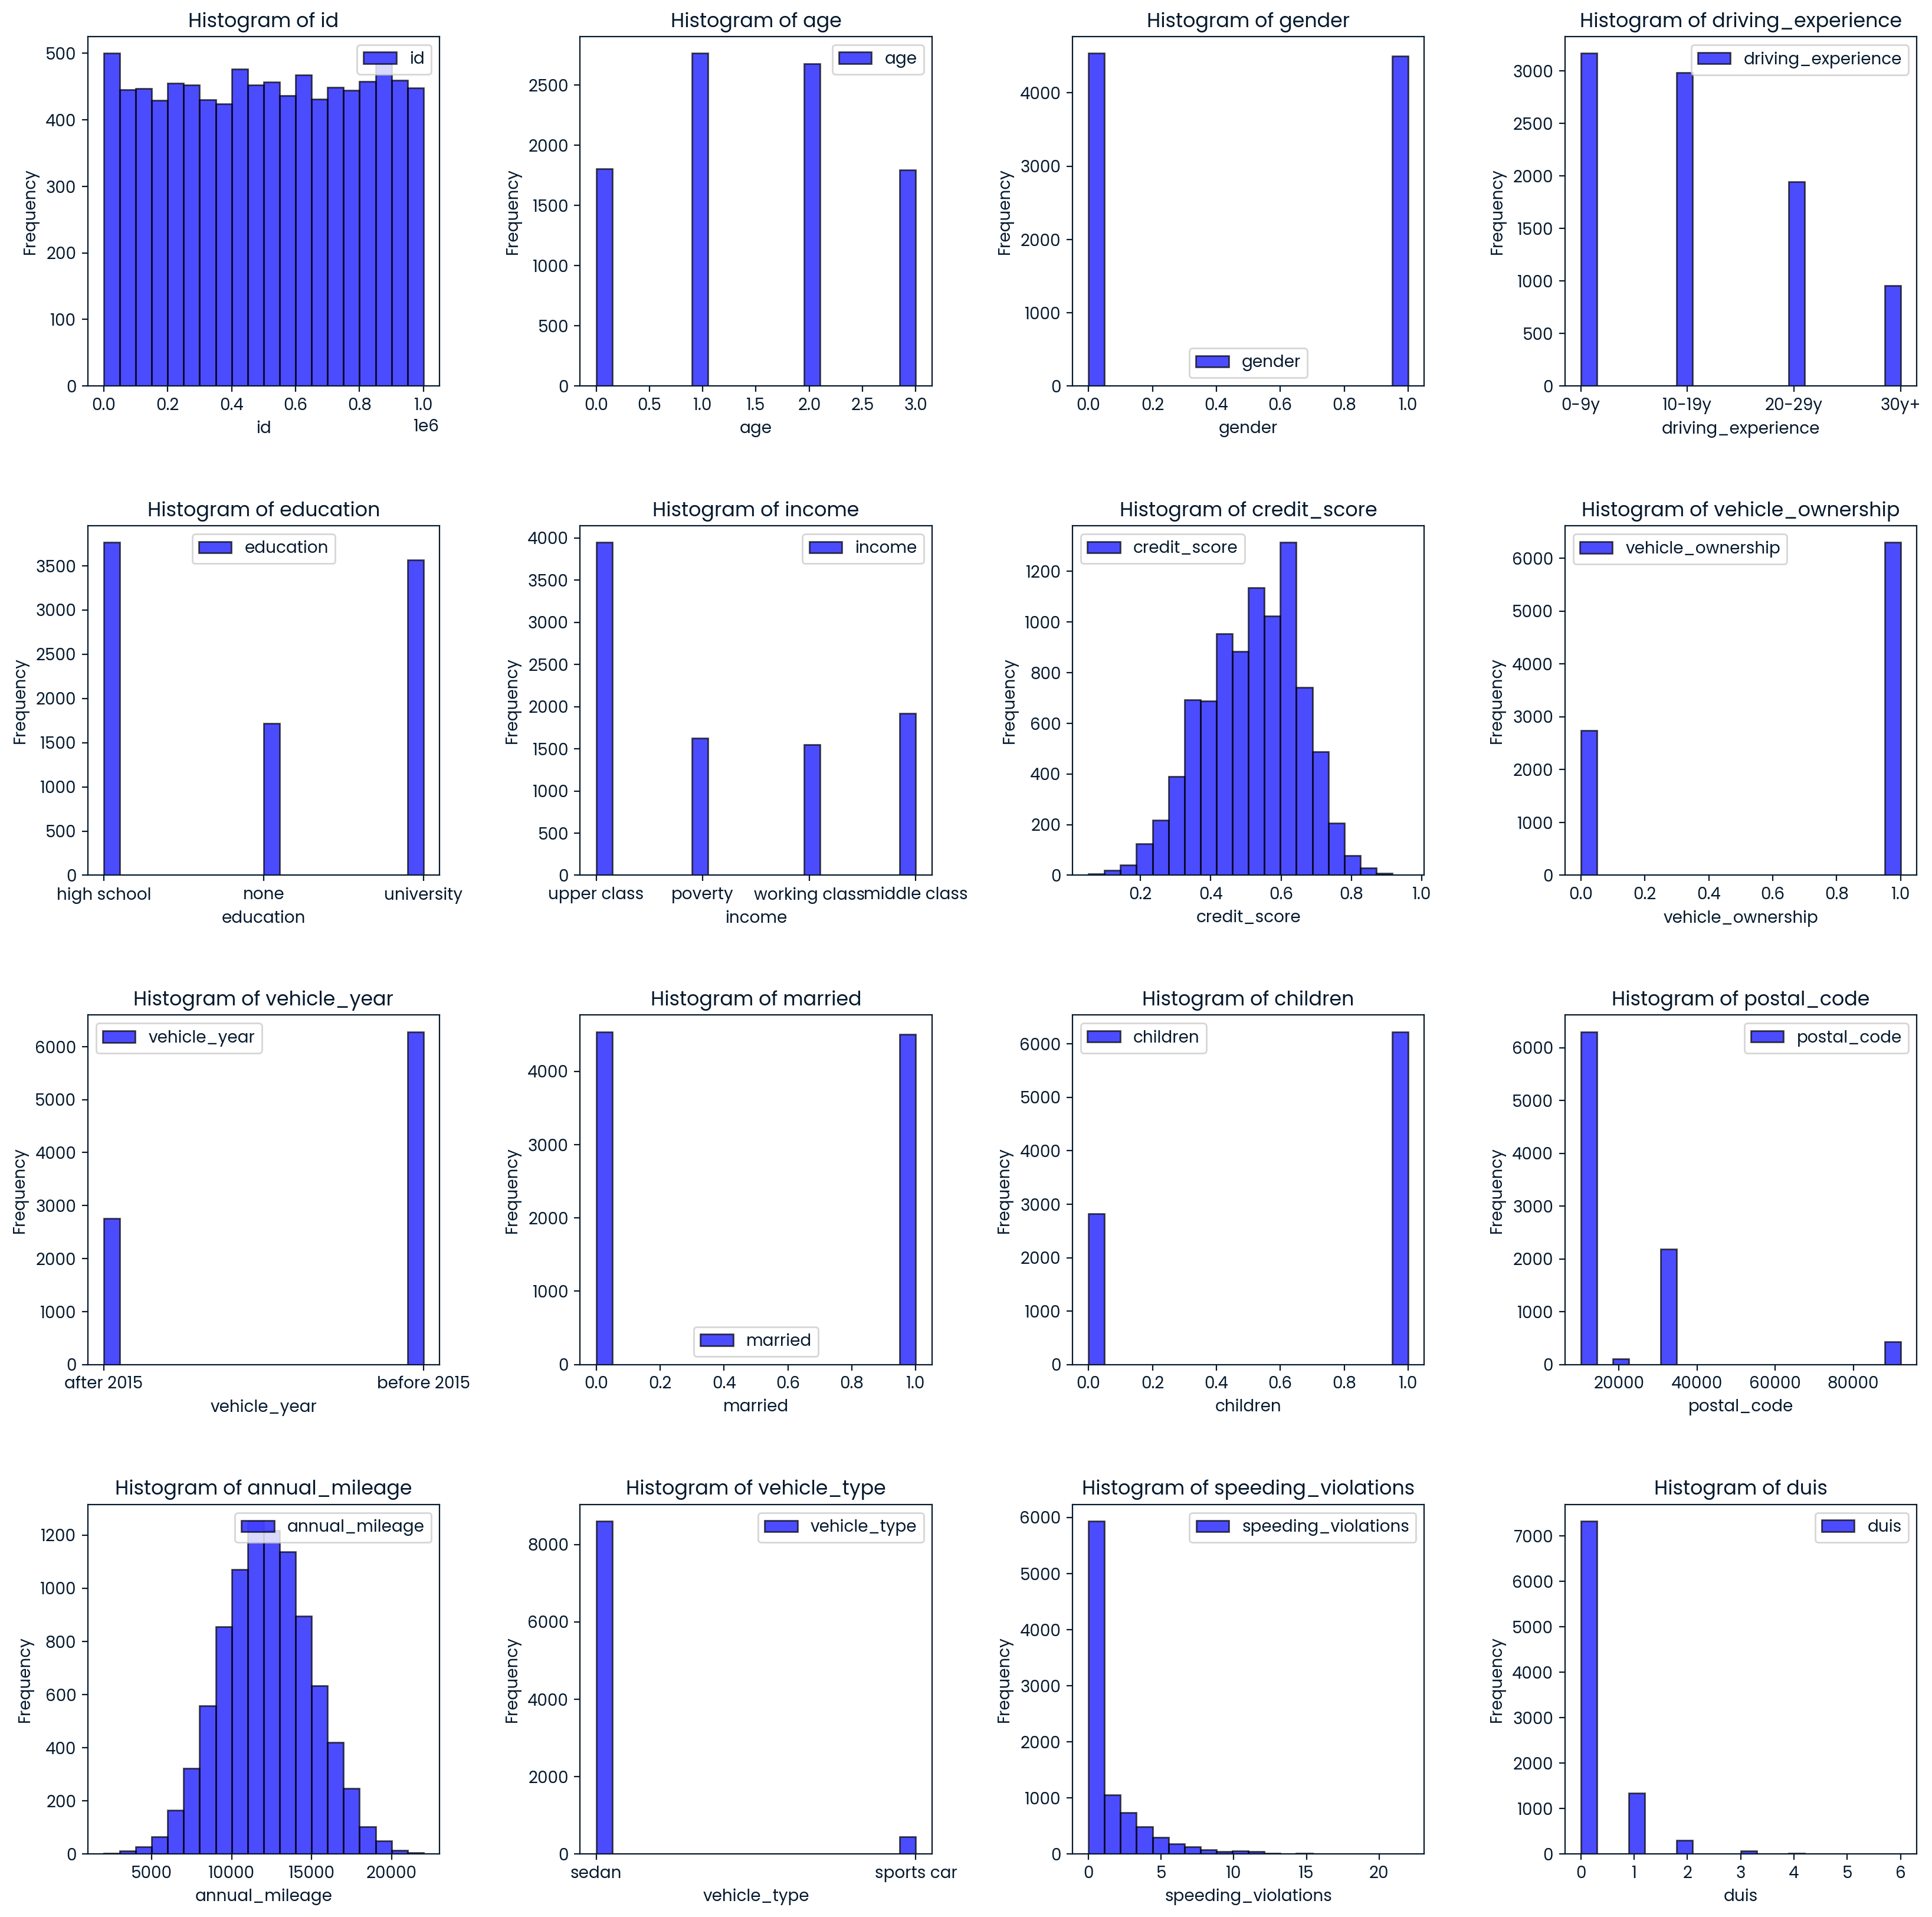

In [40]:
plot_histogram_grid(annual_mill_NotNa)

In [41]:
#For this case I will replace empty values with the meadian of annual_mileage based on weather the car was after or before 2015

before15_mileage_median = annual_mill_NotNa[annual_mill_NotNa['vehicle_year']=='before 2015']['annual_mileage'].median()
after15_mileage_median = annual_mill_NotNa[annual_mill_NotNa['vehicle_year']=='after 2015']['annual_mileage'].median()

print(before15_mileage_median,after15_mileage_median)

12000.0 11000.0


In [42]:
df.loc[(df['vehicle_year'] == 'before 2015') & (df['annual_mileage'].isnull()), 'annual_mileage'] = before15_mileage_median
df.loc[(df['vehicle_year'] == 'after 2015') & (df['annual_mileage'].isnull()), 'annual_mileage'] = after15_mileage_median

#df.info()
#Success! - All df completed! 

In [43]:
#Now we can do the models: 

models=[]

features = df.drop(columns=['id','outcome']).columns

for i in features:
    model = logit(f'outcome ~ {i}', data=df).fit()
    models.append(model)

accuracies = []

for feature in range(0, len(models)):
    # Compute the confusion matrix
    conf_matrix = models[feature].pred_table()
    # True negatives
    tn = conf_matrix[0,0]
    # True positives
    tp = conf_matrix[1,1]
    # False negatives
    fn = conf_matrix[1,0]
    # False positives
    fp = conf_matrix[0,1]
    # Compute accuracy
    acc = (tn + tp) / (tn + fn + fp + tp)
    accuracies.append(acc)
    
#done

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564566
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [44]:
#Lets combine lists

best_feature_df = pd.DataFrame({"best_feature":features,"best_accuracy":accuracies}).sort_values(by='best_accuracy',ascending=False)
print(best_feature_df)

#We can see by looking at the results that the highest accuracy predictor feature is 'driving_experience' with 0.77 or 77.7% accuracy resulted from the true positives + true negatives divided by the whole set of predictions.

           best_feature  best_accuracy
2    driving_experience         0.7771
0                   age         0.7747
4                income         0.7425
6     vehicle_ownership         0.7351
5          credit_score         0.7116
11       annual_mileage         0.6904
1                gender         0.6867
3             education         0.6867
7          vehicle_year         0.6867
8               married         0.6867
9              children         0.6867
10          postal_code         0.6867
12         vehicle_type         0.6867
13  speeding_violations         0.6867
14                 duis         0.6867
15       past_accidents         0.6867


Now to finish the project we need to: 

Store as a DataFrame called best_feature_df, containing columns named "best_feature" and "best_accuracy" with the name of the feature with the highest accuracy, and the respective accuracy score.

In [45]:
best_feature_df = best_feature_df[best_feature_df['best_feature']=='driving_experience']
print(best_feature_df)

         best_feature  best_accuracy
2  driving_experience         0.7771
